### 1. Як впливає сезон на кількість "випадкових" і зареєстрованих користувачів?

**Причина питання**: 
Зрозуміти, чи є залежність у поведінці різних типів користувачів від сезону.


**Аналіз**:
- Групувати дані за сезоном (`season`) та розрахувати середню кількість "випадкових" користувачів (`casual`) і зареєстрованих користувачів (`registered`).
- Побудувати групований стовпчастий графік, щоб порівняти ці два типи користувачів по сезонах.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('../data/yulu_rental.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


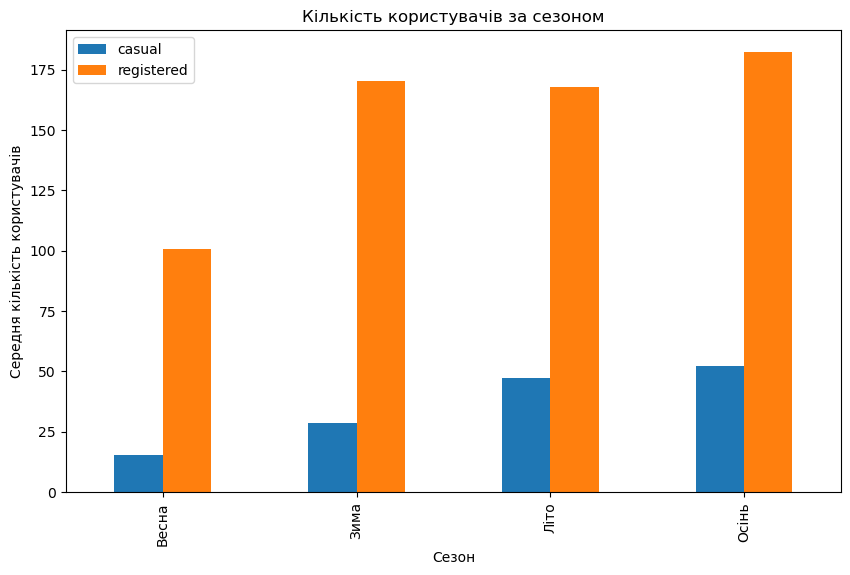

In [8]:
df['season'] = df['season'].map({1: 'Весна', 2: 'Літо', 3: 'Осінь', 4: 'Зима'})
season_data = df.groupby('season')[['casual', 'registered']].mean().reset_index()
season_data.plot(
    kind='bar', 
    x='season', 
    figsize=(10, 6), 
    title='Кількість користувачів за сезоном',
    ylabel='Середня кількість користувачів', 
    xlabel='Сезон')
plt.show()

### 2. Як залежить використання велосипедів від швидкості вітру?

**Причина питання**: 
Виявити, чи впливає сила вітру на кількість оренд велосипедів.

**Аналіз**:
- Побудувати діаграму розсіювання між швидкістю вітру (`windspeed`) і загальною кількістю оренд (`count`).
- Додати регресійну лінію для оцінки загальної тенденції.

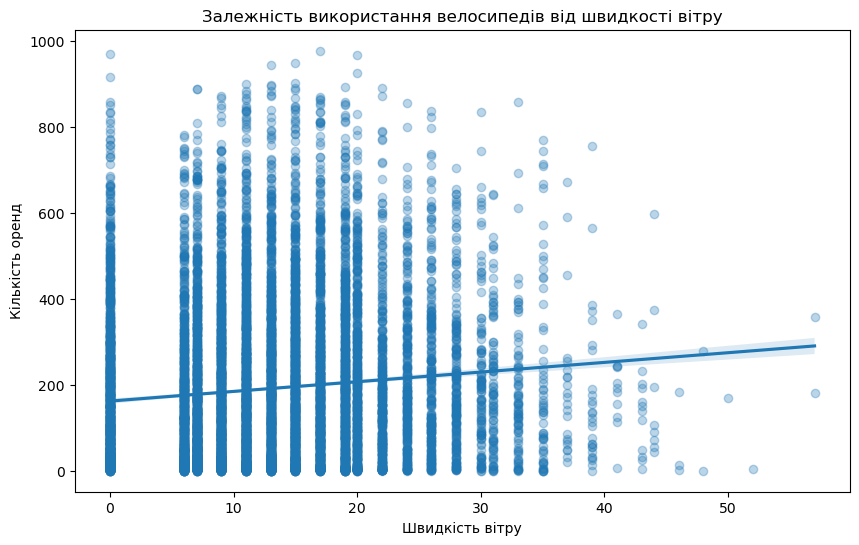

In [3]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='windspeed', y='count', scatter_kws={'alpha': 0.3})
plt.title('Залежність використання велосипедів від швидкості вітру')
plt.xlabel('Швидкість вітру')
plt.ylabel('Кількість оренд')
plt.show()

### 3. У які дні тижня велосипеди орендують найчастіше?

**Причина питання**: 
Дізнатися, в які дні тижня найчастіше орендують велосипеди, щоб покращити розподіл велосипедів.

**Аналіз**:
- Виділити день тижня з колонки datetime.
- Групувати дані за днем тижня, обчислити середню кількість орендованих велосипедів.
- Побудувати стовпчастий графік для порівняння.

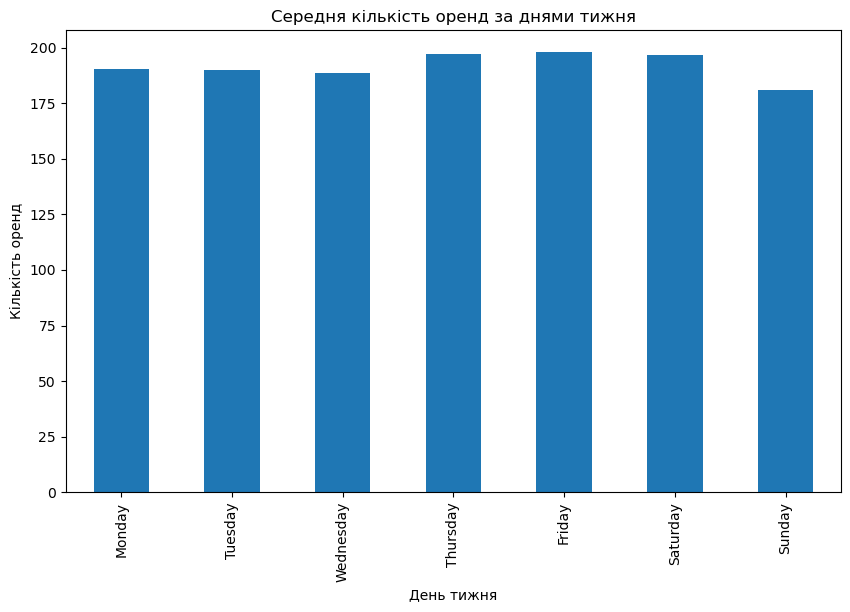

In [4]:
df['day_of_week'] = pd.to_datetime(df['datetime']).dt.day_name()
day_of_week_data = df.groupby('day_of_week')['count'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)
day_of_week_data.plot(kind='bar', figsize=(10, 6), title='Середня кількість оренд за днями тижня')
plt.xlabel('День тижня')
plt.ylabel('Кількість оренд')
plt.show()